In [ ]:
# ref: https://github.com/ncarkaci/binary-to-image
import numpy as np
import os, math
import argparse
from PIL import Image


In [ ]:
def defineColorMap():
  rows  = 256
  columns = 256
  min = 0 
  max = 255
  step = 2
  colormap = np.random.randint(min, max, size=rows * columns, dtype='l')
  colormap.resize(rows,columns)
  print(colormap)
  print("\n\n ",colormap.shape)
  return colormap

In [ ]:
colormap = defineColorMap()

[[ 71  91 140 ... 235 131 198]
 [ 87 233  82 ...  97 174 251]
 [179 152 231 ... 172  61  42]
 ...
 [ 49  80  34 ... 120  17  46]
 [103 113  52 ...  20 116  39]
 [ 80 113 161 ...  23 219 174]]


  (256, 256)


In [ ]:
R_colormap = defineColorMap()
G_colormap = defineColorMap()
B_colormap = defineColorMap()


[[ 10 146  97 ... 186 148  71]
 [ 71  98 125 ...  71  74  19]
 [243  42 146 ... 100 204 231]
 ...
 [113 119 242 ... 160 202 178]
 [ 86  21 228 ...   0  70 176]
 [190  41 175 ... 247  67  18]]


  (256, 256)
[[131 103  62 ... 114 173  53]
 [227  68 188 ... 122  30 205]
 [ 13 142  55 ...  66 176  97]
 ...
 [213 171 142 ...  50 203  22]
 [ 81  58 252 ... 173  54 239]
 [126 232 238 ...  55  66 197]]


  (256, 256)
[[ 60 138 101 ... 144 185 132]
 [ 33  14 134 ...  83  99  13]
 [ 59 134  31 ...  65  64 129]
 ...
 [130 139 227 ...  41 126   7]
 [124 232 228 ...  74  13  78]
 [ 50 232 177 ...  70 169 206]]


  (256, 256)


In [ ]:
def readBytes (filename):
  img_bin_data = []
  with open(filename, 'rb') as file:
     #this sintax is to be read as "with the output of the function open considered as a file"
     # wb as in read binary
    while True:
      # as long as we can read one byte
      b = file.read(1)
      if not b:
        break
      img_bin_data.append(int.from_bytes(b, byteorder='big'))
  return img_bin_data

In [ ]:
def readBytes_fromNumpy (filename):
  return np.load(filename)    

In [ ]:
#img_bin_data = readBytes('/content/logounirc.png')
#print(img_bin_data)

[137, 80, 78, 71, 13, 10, 26, 10, 0, 0, 0, 13, 73, 72, 68, 82, 0, 0, 6, 83, 0, 0, 5, 195, 8, 2, 0, 0, 0, 203, 59, 95, 240, 0, 0, 0, 9, 112, 72, 89, 115, 0, 0, 46, 35, 0, 0, 46, 35, 1, 120, 165, 63, 118, 0, 0, 0, 25, 116, 69, 88, 116, 83, 111, 102, 116, 119, 97, 114, 101, 0, 65, 100, 111, 98, 101, 32, 73, 109, 97, 103, 101, 82, 101, 97, 100, 121, 113, 201, 101, 60, 0, 2, 207, 161, 73, 68, 65, 84, 120, 218, 236, 221, 13, 92, 84, 117, 222, 240, 127, 106, 99, 105, 73, 152, 88, 47, 64, 210, 49, 195, 41, 237, 15, 18, 74, 222, 164, 88, 43, 186, 180, 92, 104, 184, 187, 153, 15, 120, 111, 165, 123, 165, 88, 215, 218, 131, 221, 43, 61, 184, 107, 235, 86, 216, 174, 214, 186, 91, 2, 237, 106, 181, 127, 64, 205, 174, 86, 74, 254, 36, 43, 88, 129, 15, 55, 43, 146, 192, 29, 230, 104, 234, 136, 34, 94, 166, 51, 154, 53, 113, 183, 254, 127, 122, 90, 150, 229, 225, 252, 206, 60, 207, 57, 124, 222, 47, 94, 190, 16, 14, 51, 103, 126, 115, 102, 206, 239, 124, 231, 251, 253, 254, 174, 184, 120, 241, 98, 8, 

In [ ]:
img_bin_data = readBytes_fromNumpy('/content/123.npy')
print(img_bin_data)

[[1 2 3]
 [4 5 6]]


In [ ]:
def to1DArray_greyscale(img_bin_data):
  pixel_array = []
  for index in range(0, len(img_bin_data)-2) :
    pixel_array.append(colormap[img_bin_data[index]][img_bin_data[index+1]])
  return pixel_array  

In [ ]:
greyscale_array = to1DArray_greyscale(img_bin_data)

In [ ]:
def to1DArray_RGB(img_bin_data):
  pixel_array = []
  for index in range(0, len(img_bin_data)-2) :
    pixel_array.append((R_colormap[img_bin_data[index]][img_bin_data[index+1]], G_colormap[img_bin_data[index]][img_bin_data[index+1]], B_colormap[img_bin_data[index]][img_bin_data[index+1]]))
    print(pixel_array[index])
  return pixel_array  

In [ ]:
RGB_array = to1DArray_RGB(img_bin_data)

Streaming output truncated to the last 5000 lines.
(162, 72, 113)
(55, 25, 64)
(131, 111, 67)
(172, 145, 44)
(89, 117, 56)
(143, 105, 115)
(88, 57, 124)
(36, 117, 35)
(197, 84, 150)
(38, 17, 81)
(8, 46, 94)
(112, 166, 140)
(253, 103, 101)
(240, 80, 156)
(193, 212, 85)
(108, 85, 90)
(139, 27, 230)
(209, 203, 43)
(254, 197, 0)
(154, 135, 127)
(11, 47, 59)
(54, 241, 84)
(9, 49, 112)
(93, 211, 74)
(50, 239, 149)
(32, 5, 252)
(23, 176, 54)
(186, 78, 196)
(208, 44, 207)
(57, 58, 246)
(221, 90, 65)
(236, 236, 116)
(79, 247, 27)
(213, 113, 170)
(171, 1, 37)
(117, 154, 33)
(123, 88, 196)
(182, 138, 39)
(41, 89, 201)
(166, 107, 77)
(130, 74, 44)
(117, 2, 15)
(225, 226, 160)
(220, 82, 240)
(38, 14, 177)
(9, 100, 151)
(128, 211, 30)
(231, 183, 247)
(108, 245, 185)
(71, 115, 52)
(0, 244, 53)
(246, 39, 163)
(164, 180, 152)
(235, 21, 58)
(14, 16, 75)
(41, 240, 57)
(217, 131, 29)
(159, 97, 11)
(121, 116, 187)
(14, 243, 191)
(117, 130, 201)
(121, 139, 20)
(252, 14, 146)
(207, 46, 33)
(251, 123, 228)
(7

In [ ]:
def saveImg (filename, data, size, img_type):
  try:
    image = Image.new(img_type, size)
    image.putdata(data)
    ''' ref: https://github.com/ncarkaci/binary-to-image
    setup output filename
    dirname     = os.path.dirname(filename)
    name, _     = os.path.splitext(filename)
    name        = os.path.basename(name)
    imagename   = dirname + os.sep + img_type + os.sep + name + '_'+img_type+ '.png'
    os.makedirs(os.path.dirname(imagename), exist_ok=True)'''
    image.save(filename)
    print('The file', filename, 'saved.')
  except Exception as err:
    print(err)

In [ ]:
saveImg('/content/output.png', greyscale_array, (512,512),'L')

The file /content/output.png saved.


In [ ]:
saveImg('/content/outputt.png', RGB_array, (512,512),'RGB')


The file /content/outputt.png saved.


In [ ]:
def findMax(matrix):
  max = 0
  for i in range(0,256):
    for j in range(0,256):
      if matrix[i][j]>max:
        max =  matrix[i][j]
  return int(max)

In [ ]:
def generateMarkovImg(binary_data):
  # input B (binary_data) = {b1, b2, b3...bn} is a set where bi represents the decimal value of a byte.
  # TM[i][j] represents the probability that byte bi is followed by bj
  TM = np.zeros((256,256))
  S = np.zeros((256,1))
  L = len(binary_data)
  #we determine the frequency of occurrence of byte bi followed by bi+1 and bi followed by bk where 0 ≤ k ≤ 255. 
  i=0
  while i < L-1:
    r = binary_data[i]
    
    c = binary_data[i+1]
    
    TM[r][c] = TM[r][c] +1
    S[r] = S[r] + 1
    
    i = i+1

  i = 0
  j = 0
  #compute the probability that byte bi is followed by bi+1
  while i < 256:
    rs = S[i]
    while j < 256:
      TM[i][j] = TM[i][j]/rs
      j = j+1
    i = i+1

  print("TM shape", TM.shape)
  MP = findMax(TM)
  print('max',MP)
  i = 0
  j = 0
  M =  np.zeros((256,256))
  # compute pixels in Markov image
  while i < 256:
    while j < 256:
      
      p = (TM[i][j]*(255/MP))%256
      M[i][j] = p
      j = j+1
    i = i+1
  print(M)
  return M
  #Output: M = {m1, m2, m3...mn} is a set where mi represents a pixel value in Markov image.


In [ ]:
matrix = np.zeros((256,256))
matrix[1][2] = 500

matrix[150][120] = 12
findMax(matrix)


500

In [ ]:
saveImg('/content/outputtt.png', generateMarkovImg(img_bin_data), (512,512),'L')

TM shape (256, 256)
max 180
[[0.56659641 0.00245888 0.00175634 ... 0.00351269 0.00210761 0.00351269]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
The file /content/outputtt.png saved.


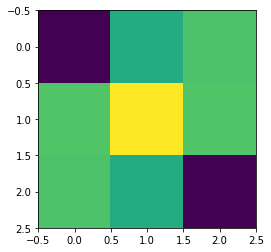

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

ksize = 3 # kernel size
sigma = 3 # standard deviation
theta = 180 # orientation of the Gabor function
lambd = 180 # width of the strips of the Gabor function
gamma = 0.5 # aspect ratio
psi = 0 # phase offset
ktype = ktype=cv2.CV_32F # 	Type of filter coefficients. It can be CV_32F or CV_64F . ?? not specified in the paper

# ref: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gae84c92d248183bd92fa713ce51cc3599
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

plt.imshow(gabor_kernel)

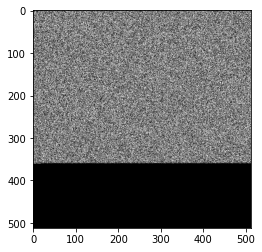

In [ ]:
image = cv2.imread('/content/output.png') # reading image

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray') 


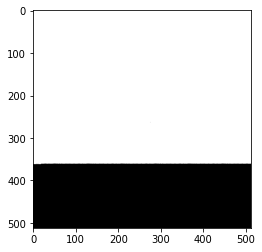

In [ ]:
filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
plt.imshow(filtered_image, cmap='gray') 